# Econometric Models

In [1]:
#Importing Necessary Packages

import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
from statsmodels.miscmodels.ordinal_model import OrderedModel
from statsmodels.formula.api import logit
from pystout import pystout
from tabulate import tabulate
import latextable

In [2]:
def confint(data):
    ci = 1.96 * np.std(data) / np.sqrt(len(data)-1)
    return ci

# Risk Perceptions Models

In [3]:
#Loading dataframes
demographics = pd.read_csv('Demographics.csv')
exposure = pd.read_csv('Narrow_exposure.csv')
info = pd.read_csv('Information.csv')
social = pd.read_csv('SocialNetworks.csv')
climaterisk = pd.read_csv('ClimateRiskPerceptions.csv')
indperceptions = pd.read_csv('IndividualHazardPerceptions.csv')
livelihoodrisk = pd.read_csv('LivelihoodPerceptions.csv')
aspirations = pd.read_csv('Aspirations.csv')


In [4]:
#Merging Datasets
risk_df = pd.DataFrame()

merge1 = pd.merge(demographics, exposure, on='HHID')
merge2 = pd.merge(merge1, info, on='HHID')
merge3 = pd.merge(merge2, social, on='HHID')
merge4 = pd.merge(merge3, climaterisk, on='HHID')
merge5 = pd.merge(merge4, indperceptions, on='HHID')
merge6 = pd.merge(merge5, livelihoodrisk, on='HHID')
merge7 = pd.merge(merge6, aspirations, on='HHID')
risk_df = merge7.dropna()
risk_df

/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_4104/446644770.py:6: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Unnamed: 0_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge3 = pd.merge(merge2, social, on='HHID')
/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_4104/446644770.py:8: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Unnamed: 0_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge5 = pd.merge(merge4, indperceptions, on='HHID')
/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_4104/446644770.py:10: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Unnamed: 0_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge7 = pd.merge(merge6, aspirations, on='HHID')


,Unnamed: 0_x,HHID,IWTime,SN,Age_x,Gender_x,M_Status,Class,S_Name,Occupation,...,Wealthy,MeetNeeds,Education,Money,Appliances,Vehicle,House,Land,FarmContinuity,ProsperousCommunity
0,2,2301006,0:10,1,43,0,1,9,0,2,...,False,1,0,1,0,0,1,1,0,0
2,9,2301013,0:06,1,49,1,1,0,0,6,...,False,1,0,1,0,0,1,1,0,0
3,11,2301016,0:15,1,55,1,1,0,0,5,...,True,1,0,1,0,1,1,1,0,1
4,22,2301017,0:05,1,47,1,1,10,0,5,...,True,1,0,0,0,0,1,0,0,1
5,26,2301021,0:10,1,65,0,1,10,0,5,...,False,1,0,1,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2360,2611114,0:11,1,47,0,1,0,0,3,...,False,1,1,0,0,0,0,1,0,0
496,2367,2611115,0:10,1,36,1,1,5,0,5,...,True,1,0,1,0,1,1,1,0,1
497,2372,2611117,0:09,1,44,1,1,0,0,5,...,True,1,0,0,1,0,1,1,0,0
498,2376,2611118,0:04,1,56,1,1,0,0,5,...,True,1,0,1,0,0,0,1,0,0


In [5]:
#Testing
risk_perceptions = pd.DataFrame()
risk_perceptions = risk_df[['HHID', 'CompositeRisk']]

for col in risk_df.columns:
    if 'Riskiness' in col:
        risk_perceptions[col] = risk_df[col]
        
clean_risk = risk_perceptions.drop(['HHID'], axis=1)
clean_risk.corr()

/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_4104/657767824.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  risk_perceptions[col] = risk_df[col]
/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_4104/657767824.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  risk_perceptions[col] = risk_df[col]
/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_4104/657767824.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

,CompositeRisk,Riskiness_CerealCrops,Riskiness_Non-CerealCrops,Riskiness_Fruit/Veg,Riskiness_LargeAnimal,Riskiness_SmallAnimal,Riskiness_Poultry,Riskiness_LocalMigrate,Riskiness_IntlMigrate,Riskiness_Business,Riskiness_Salary,Riskiness_Wage,Riskiness_Pension
CompositeRisk,1.000000,0.184148,0.211934,0.183348,0.227261,0.255653,0.159598,0.212116,0.220829,0.150031,0.092701,0.215950,0.073042
Riskiness_CerealCrops,0.184148,1.000000,0.522536,0.353631,0.346146,0.386909,0.301697,0.293304,0.292691,0.342066,0.229405,0.249229,0.102364
Riskiness_Non-CerealCrops,0.211934,0.522536,1.000000,0.470113,0.236280,0.334103,0.249758,0.226462,0.124539,0.180201,0.168132,0.298989,0.152761
Riskiness_Fruit/Veg,0.183348,0.353631,0.470113,1.000000,0.439124,0.465791,0.350956,0.324675,0.196353,0.304651,0.243167,0.355065,0.126317
Riskiness_LargeAnimal,0.227261,0.346146,0.236280,0.439124,1.000000,0.546543,0.356538,0.253945,0.241156,0.342190,0.319353,0.289418,0.058184
Riskiness_SmallAnimal,0.255653,0.386909,0.334103,0.465791,0.546543,1.000000,0.500542,0.332689,0.255881,0.339402,0.329384,0.363239,0.142408
Riskiness_Poultry,0.159598,0.301697,0.249758,0.350956,0.356538,0.500542,1.000000,0.203110,0.202166,0.288597,0.193850,0.202150,0.163130
Riskiness_LocalMigrate,0.212116,0.293304,0.226462,0.324675,0.253945,0.332689,0.203110,1.000000,0.399430,0.278232,0.302139,0.329311,0.120613
Riskiness_IntlMigrate,0.220829,0.292691,0.124539,0.196353,0.241156,0.255881,0.202166,0.399430,1.000000,0.338012,0.260177,0.201988,0.049180
Riskiness_Business,0.150031,0.342066,0.180201,0.304651,0.342190,0.339402,0.288597,0.278232,0.338012,1.000000,0.368889,0.165278,0.063263


# Influence of Info and Social Capital on Climate Risk Perceptions

In [6]:
indperceptions
exposure

,Unnamed: 0,HHID,DroughtExp,FloodExp,PestsExp,FrostExp,HailExp,HeatExp,GroundwaterExp,HazardNumber,HazardIndex
0,0,2301006,0.0,1.0,4.0,0.0,0.0,0.0,0.0,2,-0.827184
1,1,2301007,2.0,2.0,0.0,0.0,0.0,0.0,0.0,2,-0.827184
2,2,2301013,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,-1.583293
3,3,2301016,2.0,1.0,7.0,0.0,0.0,0.0,0.0,3,-0.071074
4,4,2301017,3.0,1.0,7.0,0.0,0.0,0.0,0.0,3,-0.071074
...,...,...,...,...,...,...,...,...,...,...,...
495,495,2611114,1.0,1.0,7.0,0.0,0.0,0.0,0.0,3,-0.071074
496,496,2611115,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2,-0.827184
497,497,2611117,1.0,0.0,7.0,0.0,0.0,0.0,0.0,2,-0.827184
498,498,2611118,4.0,7.0,7.0,7.0,0.0,0.0,0.0,4,0.685035


In [6]:
y = risk_df['DroughtExp']
x_1 = risk_df[['Gender_x', 'Age_x', 'Secondary', 'Gurung-Magar-Tamang', 'Dalit', 'Newar', 'Tharu-Darai-Kumal', 'Other', 'HailExp', 'SourceIndex', 'GroupIndex', 'MeetNeeds']]

             
x_1 = sm.add_constant(x_1)

est = sm.OLS(y, x_1)
est = est.fit()
est.summary()

KeyError: "['Secondary'] not in index"

In [8]:
#Saving as a Latex table
table = est.summary().tables[1]
print(tabulate(table, headers='firstrow', tablefmt='latex'))


\begin{tabular}{lllllll}
\hline
                     & coef    & std err   & t      & P\ensuremath{>}|t|   & [0.025   & 0.975]   \\
\hline
 const               & -0.0522 & 0.234     & -0.223 & 0.824   & -0.512   & 0.407    \\
 Gender              & -0.1155 & 0.082     & -1.404 & 0.161   & -0.277   & 0.046    \\
 Age                 & 0.0005  & 0.003     & 0.153  & 0.878   & -0.006   & 0.007    \\
 Secondary           & -0.0519 & 0.087     & -0.597 & 0.551   & -0.223   & 0.119    \\
 Gurung-Magar-Tamang & 0.0440  & 0.114     & 0.386  & 0.700   & -0.180   & 0.268    \\
 Dalit               & -0.1498 & 0.111     & -1.352 & 0.177   & -0.368   & 0.068    \\
 Newar               & 0.1028  & 0.263     & 0.391  & 0.696   & -0.413   & 0.619    \\
 Tharu-Darai-Kumal   & 0.0296  & 0.088     & 0.337  & 0.736   & -0.143   & 0.202    \\
 Other               & 0.2459  & 0.195     & 1.259  & 0.209   & -0.138   & 0.630    \\
 HailExp             & 0.1071  & 0.056     & 1.898  & 0.058   & -0.004   & 0.2

## Influence of Overall Climate Risk Perception on Livelihood Risk

In [9]:
risk_df['CompositeRisk_tenths'] = risk_df['CompositeRisk'] * 10

/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_27103/3052846398.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  risk_df['CompositeRisk_tenths'] = risk_df['CompositeRisk'] * 10


In [10]:
#Perceptions Ordered Logit Model
mod_prob = OrderedModel(risk_df['Riskiness_Wage'],
                        risk_df[['Gender', 'Age', 'Secondary', 'CompositeRisk_tenths', 'SourceIndex', 'GroupIndex']],
                        distr='logit')

res_log = mod_prob.fit(method='bfgs')
res_log.summary()


Optimization terminated successfully.
         Current function value: 0.816275
         Iterations: 31
         Function evaluations: 34
         Gradient evaluations: 34


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:         Riskiness_Wage   Log-Likelihood:                -406.50
Model:                   OrderedModel   AIC:                             829.0
Method:            Maximum Likelihood   BIC:                             862.7
Date:                Wed, 15 Feb 2023                                         
Time:                        17:37:10                                         
No. Observations:                 498                                         
Df Residuals:                     490                                         
Df Model:                           8                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Gender                   0.1932      0.215      0.900      0.368      -0.228       0.614
Age                     -0.0084      0.009     -0.969      0.333      -0.025       0.009
Secondary               -0.1366      0.222     -0.615      0.539      -0.572       0.299
CompositeRisk_tenths     0.1774      0.037      4.810      0.000       0.105       0.250
SourceIndex             -0.2783      0.093     -2.993      0.003      -0.461      -0.096
GroupIndex               0.0619      0.096      0.643      0.520      -0.127       0.250
1/2                     -2.7001      0.570     -4.734      0.000      -3.818      -1.582
2/3                      0.8795      0.076     11.575      0.000       0.731       1.028
========================================================================================
"""

In [11]:
#Saving as a Latex table
table = res_log.summary().tables[1]
print(tabulate(table, headers='firstrow', tablefmt='latex'))
print('\nTexttable Latex:')

\begin{tabular}{lllllll}
\hline
                      & coef    & std err   & z      & P\ensuremath{>}|z|   & [0.025   & 0.975]   \\
\hline
 Gender               & 0.1932  & 0.215     & 0.900  & 0.368   & -0.228   & 0.614    \\
 Age                  & -0.0084 & 0.009     & -0.969 & 0.333   & -0.025   & 0.009    \\
 Secondary            & -0.1366 & 0.222     & -0.615 & 0.539   & -0.572   & 0.299    \\
 CompositeRisk\_tenths & 0.1774  & 0.037     & 4.810  & 0.000   & 0.105    & 0.250    \\
 SourceIndex          & -0.2783 & 0.093     & -2.993 & 0.003   & -0.461   & -0.096   \\
 GroupIndex           & 0.0619  & 0.096     & 0.643  & 0.520   & -0.127   & 0.250    \\
 1/2                  & -2.7001 & 0.570     & -4.734 & 0.000   & -3.818   & -1.582   \\
 2/3                  & 0.8795  & 0.076     & 11.575 & 0.000   & 0.731    & 1.028    \\
\hline
\end{tabular}

Texttable Latex:


In [13]:
#Version with Caste controls
mod_prob = OrderedModel(risk_df['Riskiness_IntlMigrate'],
                        risk_df[['Gender', 'Age', 'Secondary', 'Gurung-Magar-Tamang', 'Dalit', 'Newar', 'Tharu-Darai-Kumal', 'Other', 'CompositeRisk', 'SourceIndex', 'GroupIndex']],
                        distr='logit')

res_log = mod_prob.fit(method='bfgs')
res_log.summary()


Optimization terminated successfully.
         Current function value: 0.565676
         Iterations: 77
         Function evaluations: 81
         Gradient evaluations: 81


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OrderedModel Results                              
=================================================================================
Dep. Variable:     Riskiness_IntlMigrate   Log-Likelihood:                -281.71
Model:                      OrderedModel   AIC:                             589.4
Method:               Maximum Likelihood   BIC:                             644.2
Date:                   Wed, 15 Feb 2023                                         
Time:                           17:37:15                                         
No. Observations:                    498                                         
Df Residuals:                        485                                         
Df Model:                             13                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Gender                 -0.3777      0.281     -1.342      0.179      -0.929       0.174
Age                    -0.0080      0.011     -0.705      0.481      -0.030       0.014
Secondary               0.1799      0.284      0.633      0.526      -0.377       0.737
Gurung-Magar-Tamang    -0.2695      0.371     -0.726      0.468      -0.997       0.458
Dalit                  -0.7850      0.334     -2.352      0.019      -1.439      -0.131
Newar                   0.5435      1.092      0.498      0.619      -1.596       2.683
Tharu-Darai-Kumal      -0.0717      0.296     -0.243      0.808      -0.652       0.508
Other                   1.4671      1.090      1.346      0.178      -0.669       3.603
CompositeRisk           2.1749      0.452      4.808      0.000       1.288       3.061
SourceIndex            -0.0775      0.112     -0.690      0.490      -0.297       0.143
GroupIndex             -0.2263      0.118     -1.926      0.054      -0.457       0.004
1/2                    -3.8354      0.822     -4.668      0.000      -5.446      -2.225
2/3                     0.8472      0.110      7.718      0.000       0.632       1.062
=======================================================================================
"""

In [14]:
#Saving as a Latex table
table = res_log.summary().tables[1]
print(tabulate(table, headers='firstrow', tablefmt='latex'))
print('\nTexttable Latex:')


\begin{tabular}{lllllll}
\hline
                     & coef    & std err   & z      & P\ensuremath{>}|z|   & [0.025   & 0.975]   \\
\hline
 Gender              & -0.3777 & 0.281     & -1.342 & 0.179   & -0.929   & 0.174    \\
 Age                 & -0.0080 & 0.011     & -0.705 & 0.481   & -0.030   & 0.014    \\
 Secondary           & 0.1799  & 0.284     & 0.633  & 0.526   & -0.377   & 0.737    \\
 Gurung-Magar-Tamang & -0.2695 & 0.371     & -0.726 & 0.468   & -0.997   & 0.458    \\
 Dalit               & -0.7850 & 0.334     & -2.352 & 0.019   & -1.439   & -0.131   \\
 Newar               & 0.5435  & 1.092     & 0.498  & 0.619   & -1.596   & 2.683    \\
 Tharu-Darai-Kumal   & -0.0717 & 0.296     & -0.243 & 0.808   & -0.652   & 0.508    \\
 Other               & 1.4671  & 1.090     & 1.346  & 0.178   & -0.669   & 3.603    \\
 CompositeRisk       & 2.1749  & 0.452     & 4.808  & 0.000   & 1.288    & 3.061    \\
 SourceIndex         & -0.0775 & 0.112     & -0.690 & 0.490   & -0.297   & 0.1

## Influence of Different Climate Factors on Livelihood Risk

In [15]:
#Perceptions Ordered Logit Model
mod_prob = OrderedModel(risk_df['Riskiness_Pension'],
                        risk_df[['Gender', 'Age', 'Secondary', 'Droughts', 'Floods', 'Pests', 'Groundwater', 'Heat', 'Frost', 'Hail']],
                        distr='logit')

res_log = mod_prob.fit(method='bfgs')
res_log.summary()


Optimization terminated successfully.
         Current function value: 0.882562
         Iterations: 43
         Function evaluations: 49
         Gradient evaluations: 49


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:      Riskiness_Pension   Log-Likelihood:                -439.52
Model:                   OrderedModel   AIC:                             903.0
Method:            Maximum Likelihood   BIC:                             953.6
Date:                Wed, 15 Feb 2023                                         
Time:                        17:37:18                                         
No. Observations:                 498                                         
Df Residuals:                     486                                         
Df Model:                          12                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Gender          0.3665      0.216      1.699      0.089      -0.056       0.789
Age            -0.0008      0.009     -0.089      0.929      -0.018       0.016
Secondary      -0.0092      0.214     -0.043      0.966      -0.429       0.411
Droughts        0.2130      0.128      1.668      0.095      -0.037       0.463
Floods          0.2925      0.141      2.070      0.038       0.016       0.569
Pests           0.2141      0.213      1.005      0.315      -0.203       0.631
Groundwater     0.0795      0.118      0.671      0.502      -0.153       0.312
Heat           -0.1591      0.124     -1.278      0.201      -0.403       0.085
Frost           0.1053      0.137      0.769      0.442      -0.163       0.374
Hail            0.0514      0.123      0.419      0.675      -0.189       0.292
1/2             1.0618      0.559      1.900      0.057      -0.033       2.157
2/3             0.5744      0.078      7.341      0.000       0.421       0.728
===============================================================================
"""

In [16]:
#Saving as a Latex table
table = res_log.summary().tables[1]
print(tabulate(table, headers='firstrow', tablefmt='latex'))
print('\nTexttable Latex:')

\begin{tabular}{lllllll}
\hline
             & coef    & std err   & z      & P\ensuremath{>}|z|   & [0.025   & 0.975]   \\
\hline
 Gender      & 0.3665  & 0.216     & 1.699  & 0.089   & -0.056   & 0.789    \\
 Age         & -0.0008 & 0.009     & -0.089 & 0.929   & -0.018   & 0.016    \\
 Secondary   & -0.0092 & 0.214     & -0.043 & 0.966   & -0.429   & 0.411    \\
 Droughts    & 0.2130  & 0.128     & 1.668  & 0.095   & -0.037   & 0.463    \\
 Floods      & 0.2925  & 0.141     & 2.070  & 0.038   & 0.016    & 0.569    \\
 Pests       & 0.2141  & 0.213     & 1.005  & 0.315   & -0.203   & 0.631    \\
 Groundwater & 0.0795  & 0.118     & 0.671  & 0.502   & -0.153   & 0.312    \\
 Heat        & -0.1591 & 0.124     & -1.278 & 0.201   & -0.403   & 0.085    \\
 Frost       & 0.1053  & 0.137     & 0.769  & 0.442   & -0.163   & 0.374    \\
 Hail        & 0.0514  & 0.123     & 0.419  & 0.675   & -0.189   & 0.292    \\
 1/2         & 1.0618  & 0.559     & 1.900  & 0.057   & -0.033   & 2.157    \\


## With Caste Controls

In [17]:
#Perceptions Ordered Logit Model
mod_prob = OrderedModel(risk_df['Riskiness_CerealCrops'],
                        risk_df[['Gender', 'Age', 'Secondary', 'Gurung-Magar-Tamang', 'Dalit', 'Newar', 'Tharu-Darai-Kumal', 'Other', 'Droughts', 'Floods', 'Pests', 'Groundwater', 'Heat', 'Frost', 'Hail']],
                        distr='logit')

res_log = mod_prob.fit(method='bfgs')
res_log.summary()


Optimization terminated successfully.
         Current function value: 0.802693
         Iterations: 66
         Function evaluations: 71
         Gradient evaluations: 71


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OrderedModel Results                              
=================================================================================
Dep. Variable:     Riskiness_CerealCrops   Log-Likelihood:                -399.74
Model:                      OrderedModel   AIC:                             833.5
Method:               Maximum Likelihood   BIC:                             905.1
Date:                   Wed, 15 Feb 2023                                         
Time:                           17:37:23                                         
No. Observations:                    498                                         
Df Residuals:                        481                                         
Df Model:                             17                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Gender                 -0.0477      0.226     -0.211      0.833      -0.490       0.395
Age                    -0.0033      0.009     -0.362      0.717      -0.021       0.015
Secondary               0.2539      0.232      1.095      0.273      -0.200       0.708
Gurung-Magar-Tamang     0.2261      0.324      0.698      0.485      -0.409       0.861
Dalit                  -0.1068      0.296     -0.361      0.718      -0.687       0.474
Newar                   0.2056      0.726      0.283      0.777      -1.217       1.628
Tharu-Darai-Kumal      -0.2065      0.239     -0.863      0.388      -0.675       0.262
Other                  -0.5604      0.490     -1.143      0.253      -1.521       0.401
Droughts                0.2976      0.126      2.369      0.018       0.051       0.544
Floods                  0.1036      0.135      0.770      0.441      -0.160       0.367
Pests                   0.4012      0.200      2.005      0.045       0.009       0.793
Groundwater            -0.0796      0.120     -0.665      0.506      -0.314       0.155
Heat                    0.1149      0.126      0.914      0.361      -0.131       0.361
Frost                   0.0206      0.138      0.149      0.881      -0.250       0.291
Hail                    0.3375      0.128      2.631      0.009       0.086       0.589
1/2                    -2.4946      0.663     -3.764      0.000      -3.793      -1.196
2/3                     0.8803      0.078     11.314      0.000       0.728       1.033
=======================================================================================
"""

# Adaptation Strategies Model

In [18]:
#Loading dataframes
demographics = pd.read_csv('Demographics.csv')
info = pd.read_csv('Information.csv')
social = pd.read_csv('SocialNetworks.csv')
climaterisk = pd.read_csv('ClimateRiskPerceptions.csv')
livelihoodrisk = pd.read_csv('LivelihoodPerceptions.csv')
adaptation = pd.read_csv('AdaptationStrategies.csv')
indperceptions = pd.read_csv('IndividualHazardPerceptions.csv')


In [19]:
#Merging datasets
adaptation_df = pd.DataFrame()

merge1 = pd.merge(demographics, info, on='HHID')
merge2 = pd.merge(merge1, social, on='HHID')
merge3 = pd.merge(merge2, climaterisk, on='HHID')
merge4 = pd.merge(merge3, livelihoodrisk, on='HHID')
merge5 = pd.merge(merge4, adaptation, on='HHID')
merge6 = pd.merge(merge5, indperceptions, on='HHID')

adaptation_df = merge6.dropna()
adaptation_df

/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_27103/185580249.py:6: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Unnamed: 0_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge3 = pd.merge(merge2, climaterisk, on='HHID')
/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_27103/185580249.py:8: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Unnamed: 0_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge5 = pd.merge(merge4, adaptation, on='HHID')


,Unnamed: 0_x,HHID,IWTime,SN,Age,Gender,M_Status,Class,S_Name,Occupation,...,FinancialStrategies,LivelihoodStrategies,Unnamed: 0,Droughts,Floods,Groundwater,Heat,Pests,Frost,Hail
0,2,2301006,0:10,1,43,0,1,9,0,2,...,0,0,0,-1.0,0.0,1.0,1.0,1.0,1.0,-1.0
2,9,2301013,0:06,1,49,1,1,0,0,6,...,0,0,2,0.0,0.0,1.0,-1.0,1.0,-1.0,1.0
3,11,2301016,0:15,1,55,1,1,0,0,5,...,0,0,3,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,22,2301017,0:05,1,47,1,1,10,0,5,...,0,0,4,-1.0,1.0,-1.0,-1.0,1.0,1.0,1.0
5,26,2301021,0:10,1,65,0,1,10,0,5,...,0,0,5,1.0,0.0,-1.0,-1.0,1.0,1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2360,2611114,0:11,1,47,0,1,0,0,3,...,0,0,495,1.0,0.0,-1.0,1.0,0.0,1.0,1.0
496,2367,2611115,0:10,1,36,1,1,5,0,5,...,0,1,496,1.0,1.0,-1.0,1.0,1.0,1.0,1.0
497,2372,2611117,0:09,1,44,1,1,0,0,5,...,1,0,497,1.0,0.0,-1.0,0.0,0.0,-1.0,-1.0
498,2376,2611118,0:04,1,56,1,1,0,0,5,...,0,0,498,1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0


## Influence of Climate Risk Perception, Info & Social Capital on Adaptation Strategies

In [20]:
#Perceptions Ordered Logit Model
mod_prob = OrderedModel(adaptation_df['LivelihoodStrategies'],
                        adaptation_df[['Gender', 'Age', 'Secondary', 'CompositeRisk', 'Riskiness_CerealCrops', 'Riskiness_Fruit/Veg', 'Riskiness_IntlMigrate', 'Riskiness_Wage', 'SourceIndex', 'GroupIndex']],
                        distr='logit')

res_log = mod_prob.fit(method='bfgs')
res_log.summary()

Optimization terminated successfully.
         Current function value: 0.443118
         Iterations: 57
         Function evaluations: 61
         Gradient evaluations: 61


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OrderedModel Results                              
================================================================================
Dep. Variable:     LivelihoodStrategies   Log-Likelihood:                -220.67
Model:                     OrderedModel   AIC:                             463.3
Method:              Maximum Likelihood   BIC:                             509.7
Date:                  Wed, 15 Feb 2023                                         
Time:                          17:37:30                                         
No. Observations:                   498                                         
Df Residuals:                       487                                         
Df Model:                            11                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Gender                    0.0868      0.285      0.305      0.761      -0.472       0.646
Age                      -0.0144      0.012     -1.235      0.217      -0.037       0.008
Secondary                 0.0993      0.290      0.342      0.732      -0.469       0.668
CompositeRisk            -0.1023      0.488     -0.210      0.834      -1.058       0.853
Riskiness_CerealCrops    -0.0360      0.216     -0.166      0.868      -0.460       0.388
Riskiness_Fruit/Veg      -0.3292      0.191     -1.721      0.085      -0.704       0.046
Riskiness_IntlMigrate    -0.0757      0.245     -0.309      0.757      -0.556       0.404
Riskiness_Wage           -0.2160      0.207     -1.043      0.297      -0.622       0.190
SourceIndex               0.2427      0.120      2.016      0.044       0.007       0.479
GroupIndex               -0.0665      0.126     -0.528      0.597      -0.313       0.180
0/1                      -0.5463      1.054     -0.518      0.604      -2.612       1.520
=========================================================================================
"""

In [21]:
#Saving as a Latex table
table = res_log.summary().tables[1]
print(tabulate(table, headers='firstrow', tablefmt='latex'))

\begin{tabular}{lllllll}
\hline
                       & coef    & std err   & z      & P\ensuremath{>}|z|   & [0.025   & 0.975]   \\
\hline
 Gender                & 0.0868  & 0.285     & 0.305  & 0.761   & -0.472   & 0.646    \\
 Age                   & -0.0144 & 0.012     & -1.235 & 0.217   & -0.037   & 0.008    \\
 Secondary             & 0.0993  & 0.290     & 0.342  & 0.732   & -0.469   & 0.668    \\
 CompositeRisk         & -0.1023 & 0.488     & -0.210 & 0.834   & -1.058   & 0.853    \\
 Riskiness\_CerealCrops & -0.0360 & 0.216     & -0.166 & 0.868   & -0.460   & 0.388    \\
 Riskiness\_Fruit/Veg   & -0.3292 & 0.191     & -1.721 & 0.085   & -0.704   & 0.046    \\
 Riskiness\_IntlMigrate & -0.0757 & 0.245     & -0.309 & 0.757   & -0.556   & 0.404    \\
 Riskiness\_Wage        & -0.2160 & 0.207     & -1.043 & 0.297   & -0.622   & 0.190    \\
 SourceIndex           & 0.2427  & 0.120     & 2.016  & 0.044   & 0.007    & 0.479    \\
 GroupIndex            & -0.0665 & 0.126     & -0.528 

## Effect of Individual Climate Risk Perceptions

In [22]:
#Perceptions Ordered Logit Model
mod_prob = OrderedModel(adaptation_df['FarmStrategies'],
                        adaptation_df[['Gender', 'Age', 'Secondary', 'Droughts', 'Floods', 'Pests', 'Groundwater', 'Heat', 'Frost', 'Hail','Riskiness_Fruit/Veg', 'Riskiness_Wage', 'SourceIndex', 'GroupIndex']],
                        distr='logit')

res_log = mod_prob.fit(method='bfgs')
res_log.summary()

Optimization terminated successfully.
         Current function value: 0.444172
         Iterations: 55
         Function evaluations: 60
         Gradient evaluations: 60


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:         FarmStrategies   Log-Likelihood:                -221.20
Model:                   OrderedModel   AIC:                             472.4
Method:            Maximum Likelihood   BIC:                             535.6
Date:                Wed, 15 Feb 2023                                         
Time:                        17:37:34                                         
No. Observations:                 498                                         
Df Residuals:                     483                                         
Df Model:                          15                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Gender                 -0.4300      0.297     -1.447      0.148      -1.012       0.152
Age                    -0.0114      0.012     -0.945      0.345      -0.035       0.012
Secondary              -0.6520      0.306     -2.131      0.033      -1.252      -0.052
Droughts                0.1116      0.170      0.656      0.512      -0.222       0.445
Floods                 -0.1072      0.183     -0.586      0.558      -0.466       0.251
Pests                   0.1021      0.253      0.403      0.687      -0.394       0.599
Groundwater            -0.0339      0.155     -0.218      0.827      -0.338       0.270
Heat                    0.0237      0.166      0.143      0.886      -0.301       0.348
Frost                   0.0527      0.183      0.287      0.774      -0.307       0.412
Hail                   -0.2103      0.162     -1.295      0.195      -0.529       0.108
Riskiness_Fruit/Veg    -0.3172      0.203     -1.561      0.119      -0.715       0.081
Riskiness_Wage         -0.1001      0.227     -0.442      0.659      -0.544       0.344
SourceIndex             0.4018      0.150      2.683      0.007       0.108       0.695
GroupIndex              0.0887      0.132      0.674      0.500      -0.169       0.347
0/1                    -3.6515      1.017     -3.592      0.000      -5.644      -1.659
=======================================================================================
"""

# Effect of Climate Risk on Annual Income Proportion

In [3]:
#Loading dataframes
demographics = pd.read_csv('Demographics.csv')
info = pd.read_csv('Information.csv')
social = pd.read_csv('SocialNetworks.csv')
climaterisk = pd.read_csv('ClimateRiskPerceptions.csv')
livelihoodrisk = pd.read_csv('LivelihoodPerceptions.csv')
adaptation = pd.read_csv('AdaptationStrategies.csv')
indperceptions = pd.read_csv('IndividualHazardPerceptions.csv')
exposure = pd.read_csv('AnnualExposure.csv')
incomes = pd.read_csv('IncomeBlocks.csv')
climate = pd.read_csv('ClimateData.csv')
riskpref = pd.read_csv('RiskPreferences.csv')
aspirations = pd.read_csv('Aspirations.csv')

In [4]:
#Merging datasets
income_df = pd.DataFrame()

merge1 = pd.merge(demographics, info, on='HHID')
merge2 = pd.merge(merge1, social, on='HHID')
merge3 = pd.merge(merge2, climaterisk, on='HHID')
merge4 = pd.merge(merge3, livelihoodrisk, on='HHID')
merge5 = pd.merge(merge4, incomes, on='HHID')
merge6 = pd.merge(merge5, climate, on='Year')
merge7 = pd.merge(merge6, indperceptions, on='HHID')
merge8 = pd.merge(merge7, exposure, on='HHID')
merge9 = pd.merge(merge8, riskpref, on='HHID')
merge10 = pd.merge(merge9, aspirations, on='HHID')
climate_df = merge10.dropna()

climate_df

/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_16404/3266741993.py:6: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Unnamed: 0_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge3 = pd.merge(merge2, climaterisk, on='HHID')
/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_16404/3266741993.py:8: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Unnamed: 0_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge5 = pd.merge(merge4, incomes, on='HHID')
/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_16404/3266741993.py:10: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Unnamed: 0_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge7 = pd.merge(merge6, indperceptions, on='HHID')
/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_16404/3266741993.py:12: FutureWarning: Passing 'suffixes' which c

,Unnamed: 0_x,HHID,IWTime,SN,Age_x,Gender_x,M_Status,Class,S_Name,Occupation,...,Wealthy,MeetNeeds,Education,Money,Appliances,Vehicle,House,Land,FarmContinuity,ProsperousCommunity
0,2,2301006,0:10,1,43,0,1,9,0,2,...,False,1,0,1,0,0,1,1,0,0
1,2,2301006,0:10,1,43,0,1,9,0,2,...,False,1,0,1,0,0,1,1,0,0
2,2,2301006,0:10,1,43,0,1,9,0,2,...,False,1,0,1,0,0,1,1,0,0
3,2,2301006,0:10,1,43,0,1,9,0,2,...,False,1,0,1,0,0,1,1,0,0
4,2,2301006,0:10,1,43,0,1,9,0,2,...,False,1,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24495,2379,2611119,0:24,1,73,0,1,0,0,5,...,True,1,1,1,1,1,1,1,0,1
24496,2379,2611119,0:24,1,73,0,1,0,0,5,...,True,1,1,1,1,1,1,1,0,1
24497,2379,2611119,0:24,1,73,0,1,0,0,5,...,True,1,1,1,1,1,1,1,0,1
24498,2379,2611119,0:24,1,73,0,1,0,0,5,...,True,1,1,1,1,1,1,1,0,1


In [14]:
for col in climate_df.columns:
    if '_x' in col:
        print(col)

climate_df['RiskSeek'] = climate_df['RiskSeek'].astype(float)

climate_df['Age_x'].describe()
climate_df['Older'] = climate_df['Age_x'] > 43
climate_df['Older'] = climate_df['Older'].astype(int)
climate_df['Older'].describe()

Unnamed: 0_x
Age_x
Gender_x
Caste_x
Secondary_x
Unnamed: 0_x
Unnamed: 0_x
Year_x
Unnamed: 0_x
Unnamed: 0_x


/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_16404/2063808043.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climate_df['RiskSeek'] = climate_df['RiskSeek'].astype(float)
/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_16404/2063808043.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climate_df['Older'] = climate_df['Age_x'] > 43
/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_16404/2063808043.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of

count    23989.000000
mean         0.493726
std          0.499971
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: Older, dtype: float64

In [26]:
#Creating Interaction term for income source risk and drought

sources = ['CerealCrops', 'IntlMigrate', 'Wage', 'LargeAnimal']

for item in sources:
    climate_df[item + 'x' + 'RiceDrought'] = climate_df['Riskiness_' + item] * climate_df['RiceDrought']
    climate_df[item + 'x' + 'MaizeDrought'] = climate_df['Riskiness_' + item] * climate_df['MaizeDrought']
    climate_df[item + 'x' + 'RiceDrought_1yearlag'] = climate_df['Riskiness_' + item] * climate_df['RiceDrought_1yearlag']
    climate_df[item + 'x' + 'MaizeDrought_lyearlag'] = climate_df['Riskiness_' + item] * climate_df['MaizeDrought_1yearlag']
    climate_df[item + 'xFloodExp'] = climate_df['Riskiness_' + item] * climate_df['FloodExp']
    climate_df[item + 'xDroughtExp'] = climate_df['Riskiness_' + item] * climate_df['DroughtExp']
    climate_df[item + 'xFloodExpxRiskSeek'] = climate_df['Riskiness_' + item] * climate_df['FloodExp'] * climate_df['RiskSeek']
climate_df['RiskxMaizeDrought'] = climate_df['CompositeRisk'] * climate_df['MaizeDrought']
climate_df['RiskxRiceDrought'] = climate_df['CompositeRisk'] * climate_df['RiceDrought']
climate_df['RiskxMaizeDrought_lag'] = climate_df['CompositeRisk'] * climate_df['MaizeDrought_1yearlag']
climate_df['RiskxRiceDrought_lag'] = climate_df['CompositeRisk'] * climate_df['RiceDrought_1yearlag']
climate_df['ClimateRiskxFloodExp'] = climate_df['CompositeRisk'] * climate_df['FloodExp']
climate_df['ClimateRiskxDroughtExp'] = climate_df['CompositeRisk'] * climate_df['DroughtExp']




/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_16404/1419291852.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climate_df[item + 'x' + 'RiceDrought'] = climate_df['Riskiness_' + item] * climate_df['RiceDrought']
/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_16404/1419291852.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climate_df[item + 'x' + 'MaizeDrought'] = climate_df['Riskiness_' + item] * climate_df['MaizeDrought']
/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipy

/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_16404/1419291852.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climate_df['RiskxMaizeDrought'] = climate_df['CompositeRisk'] * climate_df['MaizeDrought']
/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_16404/1419291852.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climate_df['RiskxRiceDrought'] = climate_df['CompositeRisk'] * climate_df['RiceDrought']
/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_16404/141929185

In [31]:
#OLS
livelihood_dict = {'Farm_Prop': 'CerealCrops', 'Remittances_Prop': 'IntlMigrate', 'Off-Farm Labor_Prop': 'Wage', 'Livestock_Prop': 'LargeAnimal'}

dv = 'Remittances_Prop'

y = climate_df[dv]
#x_1 = climate_df[['Gender', 'Age', 'Secondary','GroupIndex','SourceIndex', 'CompositeRisk', 'Riskiness_' + livelihood_dict[dv],'RiceDrought', 'MaizeDrought']]
#x_1 = climate_df[['Gender', 'Age', 'Secondary','GroupIndex','SourceIndex', 'CompositeRisk', 'Riskiness_CerealCrops', 'Riskiness_IntlMigrate', 'Riskiness_Wage', 'MaizeDrought', 'RiceDrought']]

#x_1 = climate_df[['Gender_x', 'Age_x', 'Secondary','GroupIndex','SourceIndex', 'CompositeRisk', 'RiskSeek','Riskiness_' + livelihood_dict[dv], 'FloodExp', livelihood_dict[dv] + 'xFloodExp', livelihood_dict[dv] + 'xFloodExpxRiskSeek', 'Year_x']]
#x_1 = climate_df[['CompositeRisk', 'Riskiness_' + livelihood_dict[dv], 'FloodExp', livelihood_dict[dv] + 'xFloodExp', 'Year_x']]
x_1 = climate_df[['Gender_x', 'Age_x', 'Secondary_x', 'CompositeRisk', 'SourceIndex', 'GroupIndex', 'FloodExp',  'DroughtExp', 'Year_x']]
x_1 = sm.add_constant(x_1)

est = sm.OLS(y, x_1)
res_log = est.fit()
res_log.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Remittances_Prop   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     68.16
Date:                Sat, 08 Apr 2023   Prob (F-statistic):          1.17e-124
Time:                        16:13:38   Log-Likelihood:                -11251.
No. Observations:               23989   AIC:                         2.252e+04
Df Residuals:                   23979   BIC:                         2.260e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.8198      0.095      8.634      0.000       0.634       1.006
Gender_x          0.0900      0.006     15.317      0.000       0.078       0.102
Age_x            -0.0009      0.000     -3.660      0.000      -0.001      -0.000
Secondary_x       0.0261      0.006      4.358      0.000       0.014       0.038
CompositeRisk     0.0374      0.010      3.815      0.000       0.018       0.057
SourceIndex       0.0317      0.003     12.043      0.000       0.027       0.037
GroupIndex       -0.0053      0.003     -2.037      0.042      -0.010      -0.000
FloodExp         -0.0282      0.006     -4.578      0.000      -0.040      -0.016
DroughtExp       -0.0242      0.006     -4.199      0.000      -0.035      -0.013
Year_x           -0.0078      0.001     -6.241      0.000      -0.010      -0.005
==============================================================================
Omnibus:                     5621.509   Durbin-Watson:                   0.075
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4125.236
Skew:                           0.913   Prob(JB):                         0.00
Kurtosis:                       2.109   Cond. No.                     3.34e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.34e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [56]:
#Saving as a Latex table
table = res_log.summary().tables[1]
print(tabulate(table, headers='firstrow', tablefmt='latex'))

\begin{tabular}{lllllll}
\hline
                & coef    & std err   & t       & P\ensuremath{>}|t|   & [0.025   & 0.975]   \\
\hline
 const          & 0.0443  & 0.094     & 0.469   & 0.639   & -0.141   & 0.230    \\
 Gender\_x       & -0.1072 & 0.006     & -18.469 & 0.000   & -0.119   & -0.096   \\
 Age\_x          & -0.0059 & 0.000     & -24.982 & 0.000   & -0.006   & -0.005   \\
 Secondary      & -0.1404 & 0.006     & -23.657 & 0.000   & -0.152   & -0.129   \\
 GroupIndex     & -0.0289 & 0.003     & -11.177 & 0.000   & -0.034   & -0.024   \\
 SourceIndex    & -0.0358 & 0.003     & -13.679 & 0.000   & -0.041   & -0.031   \\
 CompositeRisk  & -0.0726 & 0.010     & -7.323  & 0.000   & -0.092   & -0.053   \\
 Riskiness\_Wage & -0.0104 & 0.005     & -2.267  & 0.023   & -0.019   & -0.001   \\
 FloodExp       & -0.0948 & 0.027     & -3.533  & 0.000   & -0.147   & -0.042   \\
 WagexFloodExp  & 0.0302  & 0.010     & 2.958   & 0.003   & 0.010    & 0.050    \\
 Year\_x         & 0.0099  & 0.0

# Bar Graph of Effect Sizes

/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_55131/1752431282.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['','', 'Farming','','Livestock', '', 'Off-Farm Labor', '', 'Remittances'], size=24, rotation=0)


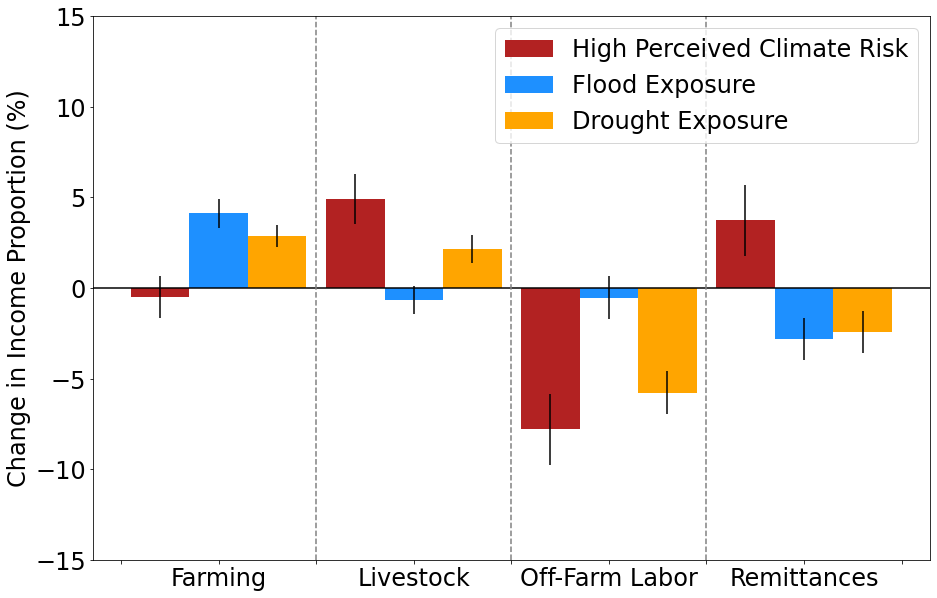

In [3]:
#Setting up bar graph of percent effect sizes on income proportion
import math
#Each array is set up as [Farm, Livestock, Off-Farm, Migration Remittances]

#Model IVs: Gender, Age, Secondary, Composite Risk, Source Index, Group Index, Flood Exp, Drought Exp, Year fe

climaterisk_effects = [-0.5, 4.90, -7.79, 3.74]
climaterisk_std = [0.6, 0.7, 1.0, 1.0]
flood_effects = [4.12, -0.65, -0.54, -2.82]
flood_std = [0.4, 0.4, 0.6, 0.6]
drought_effects = [2.87, 2.14, -5.78, -2.42]
drought_std = [0.3, 0.4, 0.6, 0.6]

climate_err = np.zeros(len(climaterisk_std))
flood_err = np.zeros(len(flood_std))
drought_err = np.zeros(len(drought_std))

dataset = [climaterisk_std, flood_std, drought_std]
error = [climate_err, flood_err, drought_err]

#Cacluating confidence intervals
for data, err in zip(dataset, error):
    for i, ele in enumerate(data):
        err[i] = 1.96 * ele 
    

f, ax1 = plt.subplots(figsize=(15,10)) 

xpos = np.arange(0,len(climaterisk_effects))
ax1.bar(xpos-0.3, climaterisk_effects, width=0.3, label='High Perceived Climate Risk', color='firebrick')
ax1.errorbar(xpos-0.3, climaterisk_effects, yerr=climate_err, color='black', fmt='none')

ax1.bar(xpos, flood_effects, width=0.3, label='Flood Exposure', color='dodgerblue')
ax1.errorbar(xpos, flood_effects, yerr=flood_err, color='black', fmt='none')

ax1.bar(xpos+0.3, drought_effects, width=0.3, label='Drought Exposure', color='orange')
ax1.errorbar(xpos+0.3, drought_effects, yerr=drought_err, color='black', fmt='none')

ax1.set_ylabel('Change in Income Proportion (%)', fontsize=24)
ax1.set_xticklabels(['','', 'Farming','','Livestock', '', 'Off-Farm Labor', '', 'Remittances'], size=24, rotation=0)

ax1.set_ylim([-15, 15])
plt.axhline(y=0, color='black')
plt.axvline(x=0.5, color='grey', ls='--')
plt.axvline(x=1.5, color='grey', ls='--')
plt.axvline(x=2.5, color='grey', ls='--')
plt.yticks(fontsize=24)
plt.legend(fontsize=24)
#plt.show()
plt.savefig('EffectSizes.png', bbox_inches='tight')


/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_16404/545808193.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['','', 'Farming','','Livestock', '', 'Off-Farm Labor', '', 'Remittances'], size=24, rotation=0)


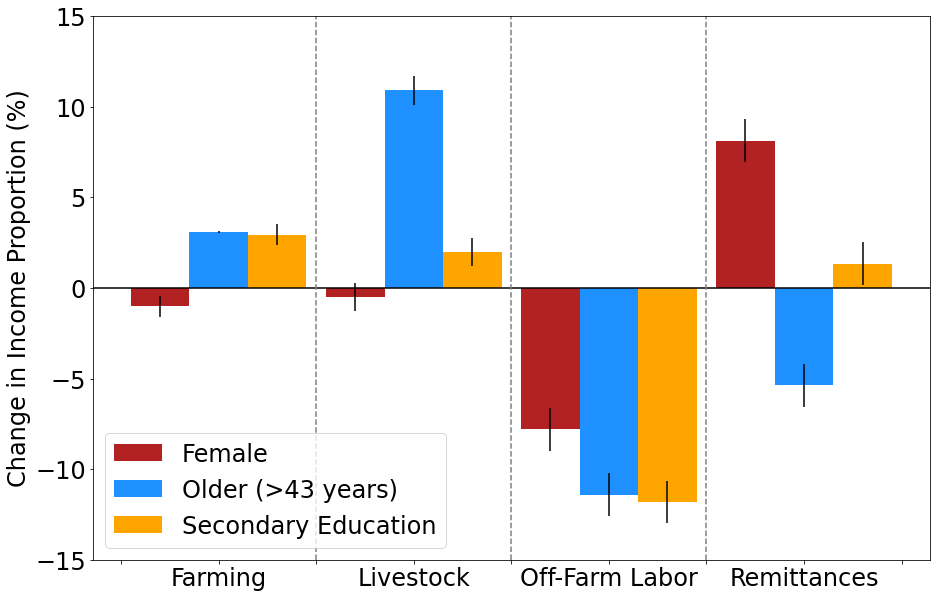

In [24]:
#Demographic Variables

#Setting up bar graph of percent effect sizes on income proportion
import math
#Each array is set up as [Farm, Livestock, Off-Farm, Migration Remittances]

#Model IVs: Gender, Age, Secondary, Composite Risk, Source Index, Group Index, Flood Exp, Drought Exp, Year fe

gender_effects = [-1.02, -0.49, -7.8, 8.13]
gender_std = [0.3, 0.4, 0.6, 0.6]
age10_effects = [3.08, 10.9, -11.4, -5.37]
age10_std = [0.03, 0.4, 0.6, 0.6]
secondary_effects = [2.95, 2.0, -11.8, 1.35]
secondary_std = [0.3, 0.4, 0.6, 0.6]

gender_err = np.zeros(len(gender_std))
age10_err = np.zeros(len(age10_std))
secondary_err = np.zeros(len(secondary_std))

dataset = [gender_std, age10_std, secondary_std]
error = [gender_err, age10_err, secondary_err]

#Cacluating confidence intervals
for data, err in zip(dataset, error):
    for i, ele in enumerate(data):
        err[i] = 1.96 * ele 
    

f, ax1 = plt.subplots(figsize=(15,10)) 

xpos = np.arange(0,len(gender_effects))
ax1.bar(xpos-0.3, gender_effects, width=0.3, label='Female', color='firebrick')
ax1.errorbar(xpos-0.3, gender_effects, yerr=gender_err, color='black', fmt='none')

ax1.bar(xpos, age10_effects, width=0.3, label='Older (>43 years)', color='dodgerblue')
ax1.errorbar(xpos, age10_effects, yerr=age10_err, color='black', fmt='none')

ax1.bar(xpos+0.3, secondary_effects, width=0.3, label='Secondary Education', color='orange')
ax1.errorbar(xpos+0.3, secondary_effects, yerr=secondary_err, color='black', fmt='none')

ax1.set_ylabel('Change in Income Proportion (%)', fontsize=24)
ax1.set_xticklabels(['','', 'Farming','','Livestock', '', 'Off-Farm Labor', '', 'Remittances'], size=24, rotation=0)

ax1.set_ylim([-15, 15])
plt.axhline(y=0, color='black')
plt.axvline(x=0.5, color='grey', ls='--')
plt.axvline(x=1.5, color='grey', ls='--')
plt.axvline(x=2.5, color='grey', ls='--')
plt.yticks(fontsize=24)
plt.legend(fontsize=24)
#plt.show()
plt.savefig('EffectSizes_Demography.png', bbox_inches='tight')


/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_16404/1022831828.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['','', 'Farming','','Livestock', '', 'Off-Farm Labor', '', 'Remittances'], size=24, rotation=0)


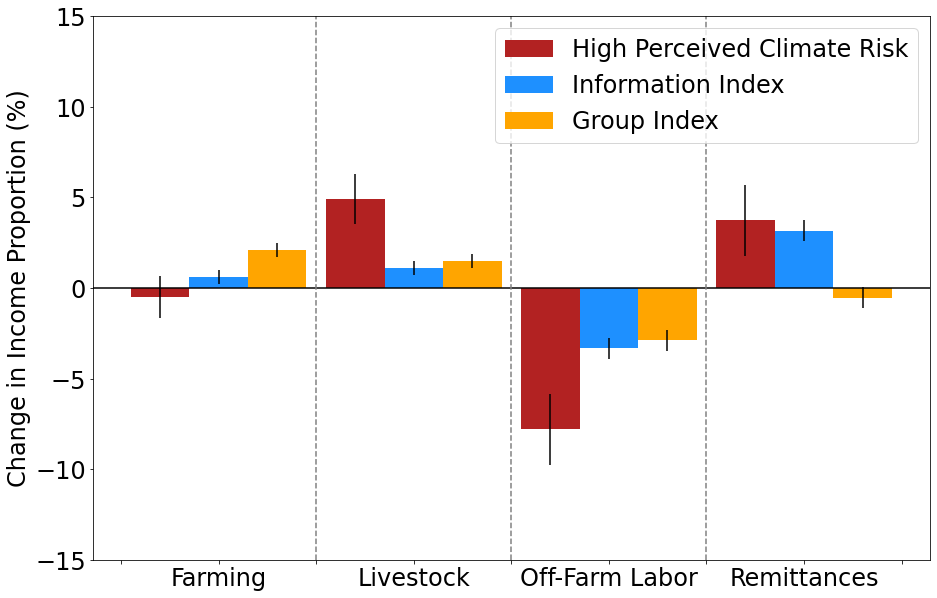

In [33]:
#Informational and Social Capital
import math
#Each array is set up as [Farm, Livestock, Off-Farm, Migration Remittances]

#Model IVs: Gender, Age, Secondary, Composite Risk, Source Index, Group Index, Flood Exp, Drought Exp, Year fe

climaterisk_effects = [-0.5, 4.90, -7.79, 3.74]
climaterisk_std = [0.6, 0.7, 1.0, 1.0]
info_effects = [0.6, 1.1, -3.33, 3.17]
info_std = [0.2, 0.2, 0.3, 0.3]
group_effects = [2.08, 1.5, -2.89, -0.53]
group_std = [0.2, 0.2, 0.3, 0.3]

climate_err = np.zeros(len(climaterisk_std))
info_err = np.zeros(len(info_std))
group_err = np.zeros(len(group_std))

dataset = [climaterisk_std, info_std, group_std]
error = [climate_err, info_err, group_err]

#Cacluating confidence intervals
for data, err in zip(dataset, error):
    for i, ele in enumerate(data):
        err[i] = 1.96 * ele 
    

f, ax1 = plt.subplots(figsize=(15,10)) 

xpos = np.arange(0,len(climaterisk_effects))
ax1.bar(xpos-0.3, climaterisk_effects, width=0.3, label='High Perceived Climate Risk', color='firebrick')
ax1.errorbar(xpos-0.3, climaterisk_effects, yerr=climate_err, color='black', fmt='none')

ax1.bar(xpos, info_effects, width=0.3, label='Information Index', color='dodgerblue')
ax1.errorbar(xpos, info_effects, yerr=info_err, color='black', fmt='none')

ax1.bar(xpos+0.3, group_effects, width=0.3, label='Group Index', color='orange')
ax1.errorbar(xpos+0.3, group_effects, yerr=group_err, color='black', fmt='none')

ax1.set_ylabel('Change in Income Proportion (%)', fontsize=24)
ax1.set_xticklabels(['','', 'Farming','','Livestock', '', 'Off-Farm Labor', '', 'Remittances'], size=24, rotation=0)

ax1.set_ylim([-15, 15])
plt.axhline(y=0, color='black')
plt.axvline(x=0.5, color='grey', ls='--')
plt.axvline(x=1.5, color='grey', ls='--')
plt.axvline(x=2.5, color='grey', ls='--')
plt.yticks(fontsize=24)
plt.legend(fontsize=24)
#plt.show()
plt.savefig('EffectSizes_Capital.png', bbox_inches='tight')

In [57]:
#Effect of specific climate hazard perceptions #TRY 1 YEAR LAG

#OLS
livelihood_dict = {'Farm_Prop': 'CerealCrops', 'Remittances_Prop': 'IntlMigrate', 'Off-Farm Labor_Prop': 'Wage'}

dv = 'Farm_Prop'

y = climate_df[dv]
x_1 = climate_df[['Gender_x', 'Age_x', 'Secondary','GroupIndex','SourceIndex', 'CompositeRisk', 'FloodExp', 'House']]
   
x_1 = sm.add_constant(x_1)

est = sm.OLS(y, x_1)
res_log = est.fit()
res_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Farm_Prop   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     77.21
Date:                Wed, 15 Feb 2023   Prob (F-statistic):          6.32e-172
Time:                        17:46:20   Log-Likelihood:                 1241.5
No. Observations:               23989   AIC:                            -2459.
Df Residuals:                   23977   BIC:                            -2362.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1150      0.009     12.744      0.000       0.097       0.133
Gender_x         -0.0247      0.004     -7.025      0.000      -0.032      -0.018
Age_x            -0.0004      0.000     -2.749      0.006      -0.001      -0.000
Secondary         0.0067      0.004      1.860      0.063      -0.000       0.014
GroupIndex        0.0198      0.002     12.756      0.000       0.017       0.023
SourceIndex       0.0040      0.002      2.516      0.012       0.001       0.007
CompositeRisk    -0.0201      0.006     -3.394      0.001      -0.032      -0.008
DroughtExp        0.0122      0.004      3.321      0.001       0.005       0.019
FloodExp          0.0264      0.004      6.808      0.000       0.019       0.034
PestsExp          0.0234      0.004      6.384      0.000       0.016       0.031
FrostExp          0.0302      0.003      9.277      0.000       0.024       0.037
HeatExp           0.0300      0.005      5.458      0.000       0.019       0.041
==============================================================================
Omnibus:                    12506.886   Durbin-Watson:                   0.094
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            67998.251
Skew:                           2.590   Prob(JB):                         0.00
Kurtosis:                       9.418   Cond. No.                         305.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Effect of Risk Perceptions on Income Proportions - Grouped by Household

In [18]:
#Loading DataFrames
demographics = pd.read_csv('Demographics.csv')
info = pd.read_csv('Information.csv')
social = pd.read_csv('SocialNetworks.csv')
climaterisk = pd.read_csv('ClimateRiskPerceptions.csv')
livelihoodrisk = pd.read_csv('LivelihoodPerceptions.csv')
adaptation = pd.read_csv('AdaptationStrategies.csv')
indperceptions = pd.read_csv('IndividualHazardPerceptions.csv')
exposure = pd.read_csv('Narrow_exposure.csv')
incomes = pd.read_csv('MeanIncomes.csv')
climate = pd.read_csv('ClimateData.csv')
riskpref = pd.read_csv('RiskPreferences.csv')
aspirations = pd.read_csv('Aspirations.csv')

In [19]:
#Merging Dataframes
income_df = pd.DataFrame()

merge1 = pd.merge(demographics, info, on='HHID')
merge2 = pd.merge(merge1, climaterisk, on='HHID')
merge3 = pd.merge(merge2, livelihoodrisk, on='HHID')
merge4 = pd.merge(merge3, social, on='HHID')
merge5 = pd.merge(merge4, incomes, on='HHID')
merge6 = pd.merge(merge5, aspirations, on='HHID')

income_df = merge6.dropna()

income_df

/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_53670/4076850470.py:6: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Unnamed: 0_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge3 = pd.merge(merge2, livelihoodrisk, on='HHID')
/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_53670/4076850470.py:8: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Unnamed: 0_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge5 = pd.merge(merge4, incomes, on='HHID')


,Unnamed: 0_x,HHID,IWTime,SN,Age_x,Gender_x,M_Status,Class,S_Name,Occupation,...,Education,Money,Appliances,Vehicle,House,Land,FarmContinuity,ProsperousCommunity,principal component 1,principal component 2
0,2,2301006,0:10,1,43,0,1,9,0,2,...,0,1,0,0,1,1,0,0,0.633545,-1.783623
2,9,2301013,0:06,1,49,1,1,0,0,6,...,0,1,0,0,1,1,0,0,0.633545,-1.783623
3,11,2301016,0:15,1,55,1,1,0,0,5,...,0,1,0,1,1,1,0,1,-0.650517,-0.986341
4,22,2301017,0:05,1,47,1,1,10,0,5,...,0,0,0,0,1,0,0,1,1.955113,0.959999
5,26,2301021,0:10,1,65,0,1,10,0,5,...,0,1,0,0,1,1,0,1,0.326855,-0.843614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2360,2611114,0:11,1,47,0,1,0,0,3,...,1,0,0,0,0,1,0,0,1.771793,0.531025
496,2367,2611115,0:10,1,36,1,1,5,0,5,...,0,1,0,1,1,1,0,1,-0.650517,-0.986341
497,2372,2611117,0:09,1,44,1,1,0,0,5,...,0,0,1,0,1,1,0,0,0.529845,-0.442407
498,2376,2611118,0:04,1,56,1,1,0,0,5,...,0,1,0,0,0,1,0,0,1.526151,-1.508926


In [25]:
#OLS
#OLS
livelihood_dict = {'Farm_Prop': 'CerealCrops', 'Remittances_Prop': 'IntlMigrate', 'Off-Farm Labor_Prop': 'Wage'}

dv = 'Farm_Prop'

y = income_df[dv]
x_1 = income_df[['Gender_x', 'Age_x', 'Secondary','GroupIndex','SourceIndex', 'CompositeRisk', 'Riskiness_CerealCrops', 'Riskiness_IntlMigrate', 'Riskiness_Wage', 'principal component 1', 'principal component 2']]

            
x_1 = sm.add_constant(x_1)

est = sm.OLS(y, x_1)
res_log = est.fit()
res_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Farm_Prop   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     2.098
Date:                Sat, 11 Mar 2023   Prob (F-statistic):             0.0191
Time:                        15:42:14   Log-Likelihood:                 249.08
No. Observations:                 498   AIC:                            -474.2
Df Residuals:                     486   BIC:                            -423.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1246      0.061      2.058      0.040       0.006       0.244
Gender_x                 -0.0151      0.016     -0.961      0.337      -0.046       0.016
Age_x                     0.0001      0.001      0.167      0.868      -0.001       0.001
Secondary                 0.0101      0.016      0.620      0.536      -0.022       0.042
GroupIndex                0.0222      0.007      3.163      0.002       0.008       0.036
SourceIndex               0.0002      0.007      0.025      0.980      -0.014       0.014
CompositeRisk             0.0187      0.027      0.682      0.496      -0.035       0.073
Riskiness_CerealCrops     0.0251      0.012      2.117      0.035       0.002       0.048
Riskiness_IntlMigrate    -0.0210      0.014     -1.455      0.146      -0.049       0.007
Riskiness_Wage           -0.0187      0.012     -1.604      0.109      -0.042       0.004
principal component 1    -0.0031      0.004     -0.760      0.447      -0.011       0.005
principal component 2    -0.0065      0.005     -1.281      0.201      -0.017       0.003
==============================================================================
Omnibus:                      352.249   Durbin-Watson:                   1.565
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3881.551
Skew:                           3.074   Prob(JB):                         0.00
Kurtosis:                      15.217   Cond. No.                         438.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
#Saving as a Latex table
table = res_log.summary().tables[1]
print(tabulate(table, headers='firstrow', tablefmt='latex'))

\begin{tabular}{lllllll}
\hline
                       & coef    & std err   & t      & P\ensuremath{>}|t|   & [0.025   & 0.975]   \\
\hline
 const                 & 0.5010  & 0.142     & 3.526  & 0.000   & 0.222    & 0.780    \\
 Gender                & -0.0811 & 0.037     & -2.200 & 0.028   & -0.153   & -0.009   \\
 Age                   & -0.0051 & 0.001     & -3.407 & 0.001   & -0.008   & -0.002   \\
 Secondary             & -0.1172 & 0.038     & -3.101 & 0.002   & -0.191   & -0.043   \\
 GroupIndex            & -0.0214 & 0.016     & -1.303 & 0.193   & -0.054   & 0.011    \\
 SourceIndex           & -0.0374 & 0.016     & -2.266 & 0.024   & -0.070   & -0.005   \\
 CompositeRisk         & -0.1251 & 0.064     & -1.945 & 0.052   & -0.251   & 0.001    \\
 Riskiness\_CerealCrops & -0.0439 & 0.028     & -1.579 & 0.115   & -0.098   & 0.011    \\
 Riskiness\_IntlMigrate & 0.1161  & 0.034     & 3.435  & 0.001   & 0.050    & 0.183    \\
 Riskiness\_Wage        & -0.0006 & 0.027     & -0.020 &